In [68]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
class Cnn:

    # initialise the cnn
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each inut, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        #link weight matrices
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass

    # train the cnn
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        # output layer error is target - actual
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)

        # update the weights for the links between hidden and output layers
        # update the weights for the links between the input and hidden layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        self.wih = self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

        pass

    # query the cnn
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate zhe signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs
        


In [70]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 26

learning_rate = 0.3

#create instance of cnn class
n = Cnn(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [71]:
""" 
    erste Zahl gibt label an
    all_values[1:] = es werden alle Werte verwendet, außer dem Label
"""

' \n    erste Zahl gibt label an\n    all_values[1:] = es werden alle Werte verwendet, außer dem Label\n'

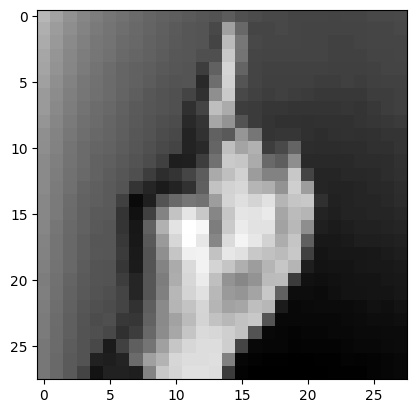

In [72]:
# test
data_file = open('mnist_data/sign_mnist_train.csv')
data_list = data_file.readlines()
data_file.close()

all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation=None)

In [73]:
# load mnnist training data csv file into a list
training_data_file = open('mnist_data/sign_mnist_train.csv')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [74]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5
for e in range (epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [75]:
# load mnnist test data csv file into a list
test_data_file = open('mnist_data/sign_mnist_test.csv')
test_data_list = test_data_file.readlines()
test_data_file.close()

test_all_values = test_data_list[0].split(',')
print(test_all_values[0])

6


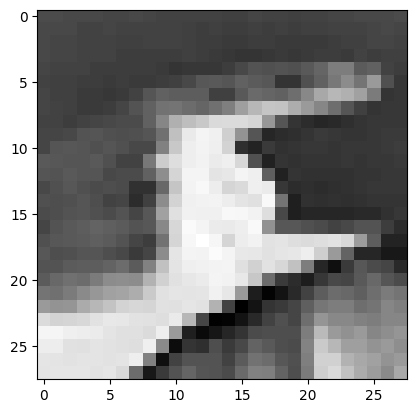

In [76]:
# test
image_array = np.asfarray(test_all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation=None)

In [77]:
# test
n.query((np.asfarray(test_all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.06671818],
       [0.07554837],
       [0.06463304],
       [0.07096397],
       [0.06157999],
       [0.07196473],
       [0.06704993],
       [0.08556156],
       [0.06090388],
       [0.04723541],
       [0.07078851],
       [0.07224654],
       [0.07132006],
       [0.07366862],
       [0.07129479],
       [0.06332524],
       [0.06911307],
       [0.07808751],
       [0.06446681],
       [0.07524671],
       [0.06418188],
       [0.06803537],
       [0.06390711],
       [0.07698116],
       [0.06198859],
       [0.04780974]])

In [78]:
# calculate performance store
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])

    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)

    label = np.argmax(outputs)

    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

In [79]:
# print the peformance
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.06079196876742889
